<a href="https://colab.research.google.com/github/JaredGlaub/RandomForestRegressions/blob/main/Assignment4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practical Machine Learning
#### Assignment 4: Random Forests and Gradient Boosting 

Description:
This assignment builds on work completed for Assignment 2: Regression Models. You are asked to add random forests to the set of modeling methods being studied.Work with data from the Boston Housing Study, as described in the attached handout:
Boston_Housing_Study-1.pdf

For your convenience, the data are attached here:
boston.csv 

Use all explanatory variables (except neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. Also employ random forests to the regression problem, following methods described in Géron (2017) Chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Python scikit-learn should be your primary environment for conducting this research.

Try alternative versions of random forests and gradient boosting. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management.

Regarding the management problem, imagine that you again are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

Programming Resources
Recall from Assignment 2 that a detailed example showed how to evaluate alternative regressors within a cross-validation design:

Modules / Week 2 / Additional Resources / Regression Examples: Predicting Sales
If you built on that example for Assignment 2, then you should have the structure in place to add random forests as an additional regressor to evaluate. You can keep the work for previous regressors in place. This means that much of the coding work for this assignment will have been completed before you begin the assignment.

Other key programming resources for this assignment include Chapters 6 and 7 of the Géron (2017) textbook and scikit-learn documentation at the link here (Links to an external site.)Links to an external site.. 

Another useful reference for this assignment is under:
Modules / Week 2 / Additional Resources / Regression Examples: California Housing Study

 
Programming Notes
Note that one of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees.  This is given by the max_features meta-parameter. You might try alternative values for this parameter as you fit random forests to the Boston Housing Study data.

With 12 explanatory variables, the range of possible values for max_features is from 1 to 12.  
max_features = 1  forces each tree to split on a single feature ... not ability to detect interaction effects
max_features = 12 means that there will be no randomness in the features being considered for each tree ... could lead to overfitting

Müller and Guido (2017) suggest using max_features = ‘log2’ for random forest regression problems and max_features = ‘sqrt’ for classification problems.

Regarding the other meta-parameters, ensure that bootstrap = True always, and set high values for n_estimators so that estimators are more stable. In my programs for the Boston Housing Study, I have been using n_estimators = 100.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here (https://github.com/amueller/introduction_to_ml_with_python)
 

Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
Please upload the completed jupyter notebook  ( PREFERRED )

OR 

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
- Refer to Google's Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python codeLinks to an external site.
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.

In [ ]:
# Boston Housing Study with Random Forest Regression (Python)

# program revised by Thomas W. Miller (2017/10/21)

# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.ensemble.RandomForestRegressor.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# to obtain a listing of the results of this program, 
# locate yourself in the working direcotry and
# execute the following command in a terminal or commands window
# python solution-boston-housing-assignment-5-v002.py > 
#    listing-solution-boston-housing-assignment-5-v002.txt

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import base packages into the namespace for this program & # modeling routines from Scikit Learn packages

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  # static plotting
import numpy as np               # arrays and math functions
import os
import pandas as pd              # data frame operations 
from pandas.plotting import scatter_matrix
import pylab as pl
import seaborn as sns            # pretty plotting, including heat map
import sklearn
import sklearn.linear_model
from math import sqrt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Decision Trees
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from IPython.display import Image
from sklearn.inspection import permutation_importance
# from sklearn.cross_validation import ShuffleSplit

from decimal import Decimal

In [ ]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory

import os # Operation System
os.getcwd()
%cd /content/gdrive/MyDrive/422Data
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/MyDrive/422Data"

/content/gdrive/MyDrive/422Data
/content/gdrive/MyDrive/422Data
bank.csv    MSDS422_covid19_20200825v3.csv  studenmunds_restaurants.csv
boston.csv  plot-corr-map.pdf		    titanic
Working Directory
/content/gdrive/MyDrive/422Data


In [ ]:
# read data for the Boston Housing Study
# creating data frame restdata
# initial work with the data set
boston_input = pd.read_csv(work_dir+'/boston.csv')
prices = boston_input['mv']

#LOCAL INSTANCE
#boston_input = pd.read_csv('./data/boston.csv')
#prices = boston_input['mv']

###### DESCRIPTION OF THE DATA SET   { IS THIS TRUE ?? }

There are 14 features in the boston housing dataset. Of the 14, "mv" is the response variable and the remaining 13 are the target variables. One of the features, "neighborhood" is a categorical variable with 93 unique values and cambridge having the highest frequency. No further analysis needed for the neighborhood as it has to be dropped from the dataframe.
Note: Though the neighborhood feature is being dropped and not being used in the analysis, it's still good practice to at least understand some basic information about the feature before dropping or creating a new dataframe without it.

In [ ]:
# check the pandas DataFrame object boston_input
print('\n BOSTON DataFrame (first and last five rows):\n')
print(boston_input.head())
print(boston_input.tail())


 BOSTON DataFrame (first and last five rows):

  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0 

In [ ]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [ ]:
# Check for missing values
boston_input.isnull().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [ ]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of the neighborhood feature.
boston_input['neighborhood'].describe()

count           506
unique           93
top       Cambridge
freq             30
Name: neighborhood, dtype: object

In [ ]:
# Display unique neighborhoods
boston_input['neighborhood'].unique()

array(['Nahant', 'Swampscott', 'Swanpscott', 'Marblehead', 'Salem',
       'Lynn', 'Saugus', 'Lynnfield', 'Peabody', 'Danvers', 'Middleton',
       'Topsfield', 'Hamilton', 'Wenham', 'Beverly', 'Manchester',
       'North_Reading', 'Wilmington', 'Burlington', 'Woburn', 'Reading',
       'Wakefield', 'Melrose', 'Stoneham', 'Winchester', 'Medford',
       'Malden', 'Everett', 'Somerville', 'Cambridge', 'Arlington',
       'Belmont', 'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury',
       'Wayland', 'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick',
       'Framingham', 'Ashland', 'Sherborn', 'Brookline', 'Dedham',
       'Needham', 'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk',
       'Walpole', 'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton',
       'Quincy', 'Braintree', 'Randolph', 'Holbrook', 'Weymouth',
       'Cohasset', 'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell',
       'Scituate', 'Marshfield', 'Duxbury', 'Pembroke',
       'Allston-Brighton', 'Bac

In [ ]:
# Examine the top 5 & bottom 5 neighborhoods by the response variable "mv"

top_5 = boston_input[['mv','neighborhood']]
top_5 = top_5.groupby('neighborhood').mean()
top_5 = top_5.sort_values('mv', ascending = False)
print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.head(5))
print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.tail(5))
# print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.head(5))
# print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.tail(5))


Top 5 Neighborhoods:
= = = = = = = = = = = = =
                 mv
neighborhood       
Lincoln       50.00
Beacon_Hill   50.00
Dover         50.00
Weston        49.25
Sherborn      44.00

Bottom 5 Neighborhoods:
= = = = = = = = = = = = =
                     mv
neighborhood           
Chelsea       12.800000
Charlestown   12.400000
Roxbury       11.615789
East_Boston   11.563636
South_Boston   9.123077


In [ ]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of a dataset’s distribution
boston_input.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# Calculating statistics of the feature "mv"

# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

print("Statistics for Boston Housing Dataset:")
print("--------------------------------------------------")
print("Minimum price:                ${}".format(minimum_price)) 
print("Maximum price:                ${}".format(maximum_price))
print("Mean price:                   ${}".format(mean_price))
print("Median price                  ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston Housing Dataset:
--------------------------------------------------
Minimum price:                $5.0
Maximum price:                $50.0
Mean price:                   $22.528853754940737
Median price                  $21.2
Standard deviation of prices: $9.17309809855143


In [ ]:
print(boston_input.corr())

             crim        zn     indus  ...   ptratio     lstat        mv
crim     1.000000 -0.200469  0.406583  ...  0.289946  0.455621 -0.389582
zn      -0.200469  1.000000 -0.533828  ... -0.391679 -0.412995  0.360386
indus    0.406583 -0.533828  1.000000  ...  0.383248  0.603800 -0.484754
chas    -0.055892 -0.042697  0.062938  ... -0.121515 -0.053929  0.175663
nox      0.420972 -0.516604  0.763651  ...  0.188933  0.590879 -0.429300
rooms   -0.219247  0.311991 -0.391676  ... -0.355501 -0.613808  0.696304
age      0.352734 -0.569537  0.644779  ...  0.261515  0.602339 -0.377999
dis     -0.379670  0.664408 -0.708027  ... -0.232471 -0.496996  0.249315
rad      0.625505 -0.311948  0.595129  ...  0.464741  0.488676 -0.384766
tax      0.582764 -0.314563  0.720760  ...  0.460853  0.543993 -0.471979
ptratio  0.289946 -0.391679  0.383248  ...  1.000000  0.374044 -0.505655
lstat    0.455621 -0.412995  0.603800  ...  0.374044  1.000000 -0.740836
mv      -0.389582  0.360386 -0.484754  ... -0.50565

In [ ]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


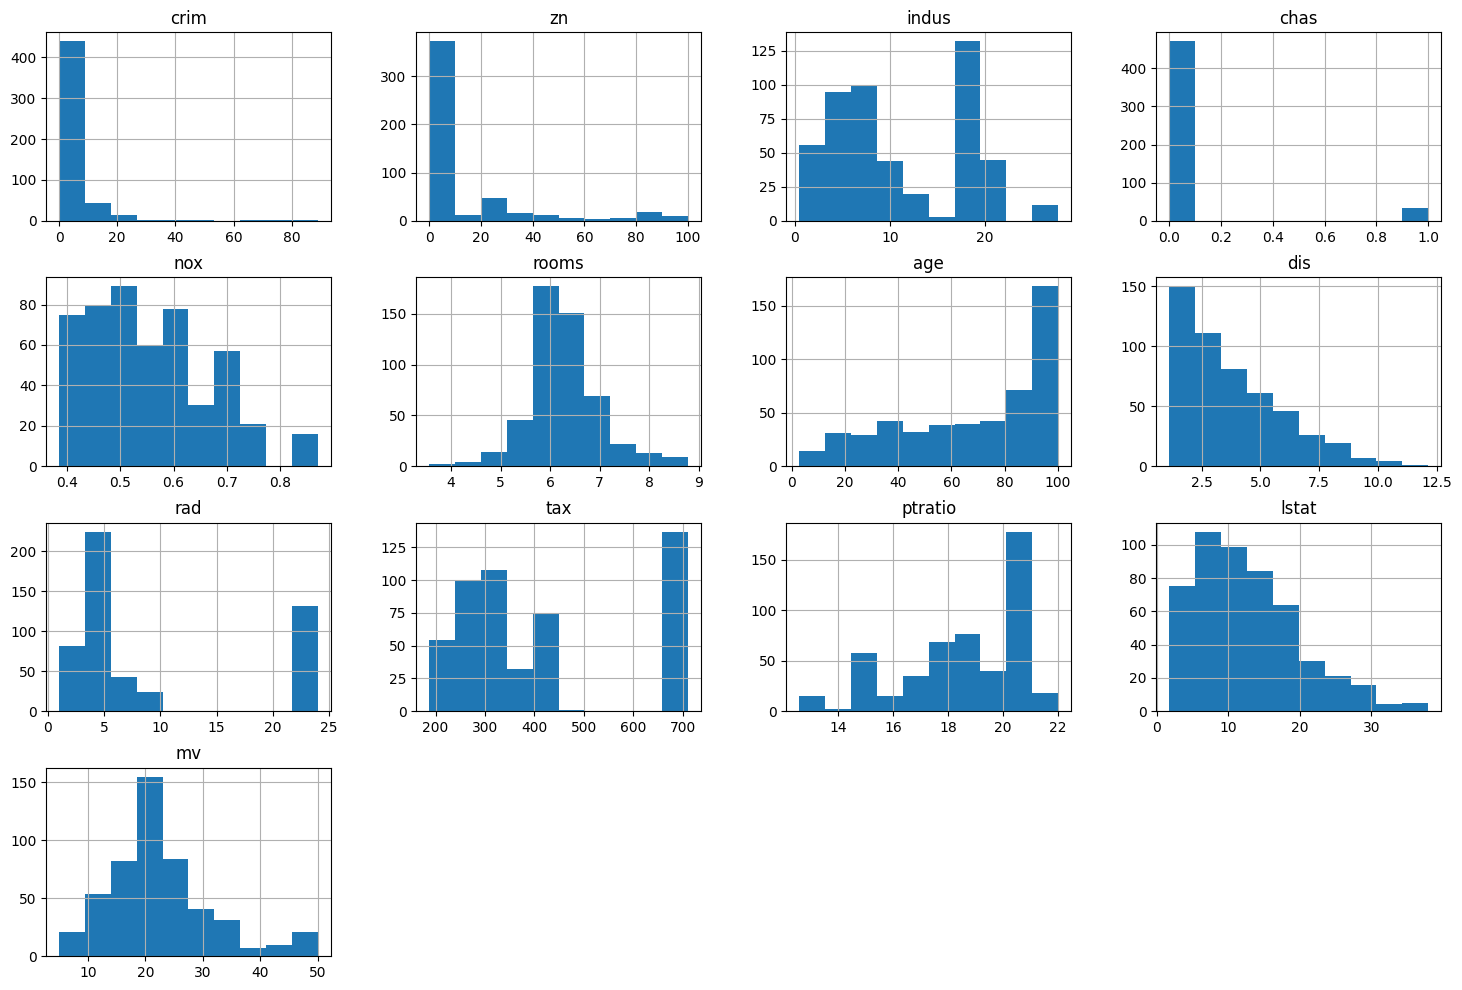

In [ ]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

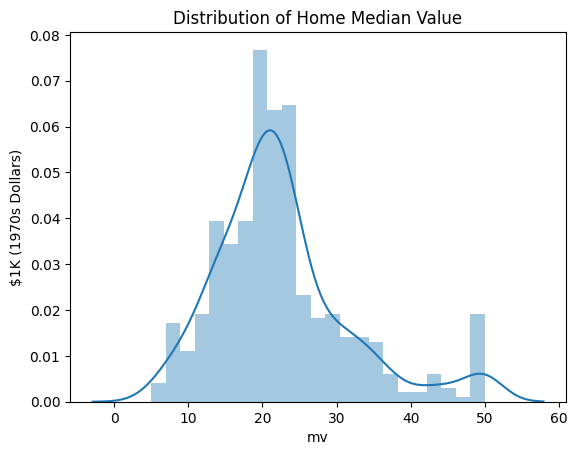

In [ ]:
sns.distplot(boston['mv'])
plt.title("Distribution of Home Median Value")
plt.ylabel("$1K (1970s Dollars)")
plt.show()

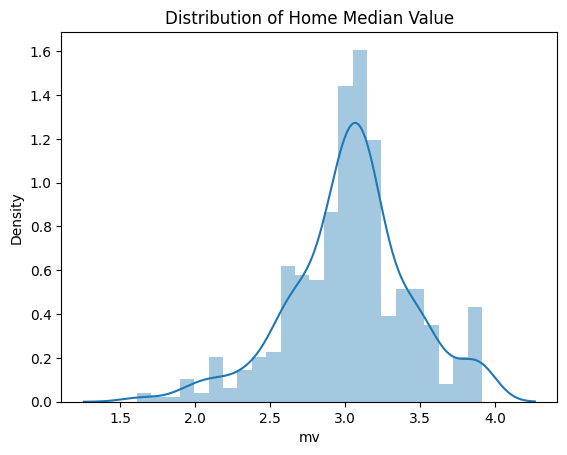

In [ ]:
sns.distplot(np.log(boston['mv']))
plt.title("Distribution of Home Median Value")
plt.show()

# now left skewed, not really worth using 

In [ ]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [ ]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

#What does the below plot indicate ?

In [ ]:
sns.pairplot(boston)
plt.show()

# Thoughts on the pair plots ?

In [ ]:
# Initializing the X and Y variables
import math
X = boston[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = boston['mv']
feature_cols = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

# Splitting the boston dataframe into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)
# print(X_train.head(5))
# print(y.head(5))

# Log transformation of target variable
y_log = np.log(boston['mv'])
# print(y_log.head(5))

# Splitting the boston dataframe into train and test sets accounting for the log transformation of the Target Variable
X_train, X_test, y_log_train, y_log_test = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=1337)
# print(X_train.head(5))

In [ ]:
# Normalizing the data set using the MinMaxScaler transformation 

scaler = preprocessing.MinMaxScaler()
# scaler.fit(X_train)

# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

pd.DataFrame(data=X_train_norm, columns=X_train.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.039520,0.105354,0.399063,0.073746,0.357143,0.531510,0.666497,0.272184,0.368988,0.421434,0.613946,0.327926
std,0.091874,0.222944,0.255219,0.261744,0.242499,0.135374,0.300365,0.219674,0.373885,0.321101,0.234487,0.211553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000890,0.000000,0.173387,0.000000,0.150206,0.453918,0.398188,0.098773,0.130435,0.176864,0.468085,0.151483
50%,0.003071,0.000000,0.338343,0.000000,0.314815,0.518763,0.766525,0.204537,0.173913,0.271511,0.680851,0.292070
75%,0.039851,0.125000,0.646628,0.000000,0.491770,0.595081,0.940299,0.418971,1.000000,0.913958,0.808511,0.460654
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# MinMaxScaler to normalize the entire dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(X)

pd.DataFrame(data=X_norm, columns=X.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.529581,0.664978,0.278472,0.371713,0.421104,0.622929,0.330601
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.136616,0.300094,0.223738,0.378576,0.322251,0.230313,0.216134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035181,-0.004739,0.000000,-0.001912,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.451974,0.413913,0.098388,0.130435,0.173996,0.510638,0.157990
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.514777,0.760128,0.216039,0.173913,0.271511,0.686170,0.291465
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.595470,0.936834,0.426523,1.000000,0.913958,0.808511,0.460805
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.014777,1.000000,1.163715,1.000000,1.000000,1.000000,1.096852


###### Normalizing all Features to the same Magnitude Using MinMaxScaler
From the output of the MinMaxScaler above, the mean represents the interest level.
It should be noted that most of the times, features in datasets vary highly in magnitudes, units and range. Given that most of the machine learning algorithms use the Eucledian distance between two datapoints in their computation, the varying magnitudes, units and range of the features pose a problem where by the ML algorithms would take into account only the magnitudes ignoring the units. As a result, features with high magnitudes would weigh alot more in the Eucladian distance calculations than those with low magnitudes.
As a mitigation step, all the features were normalized to the same magnitude level using the MinMaxScaler in SciKit package.

THOUGHTS ON THE ABOVE ?

In [ ]:
# HOW ABOUT USING STANDARD SCALAR
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [ ]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [ ]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


###### MODEL 1: Linear Regression 
Linear regression and CrossValidation regression performed and both the RMSE and Accuracy for the models were computed for evaluation.

In [ ]:
# LinearRegression()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_lr = lr.predict(X_train_norm)
y_pred_test_lr = lr.predict(X_test_norm)
y_pred_all_lr = lr.predict(X_norm)

# Construct a vector of errors for train and test data sets
lr_err_train = abs(y_pred_train_lr - y_train)
lr_err_test = abs(y_pred_test_lr - y_test)
lr_err_all = abs(y_pred_all_lr - y)

# Compute MSE for Train set, Test set and Entire set
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_test_lr)
mse_lr_all = mean_squared_error(y, y_pred_all_lr)

# Compute RMSE for Train set, Test set and Entire set
rmse_lr_train = sqrt(abs(mse_lr_train))
rmse_lr_test = sqrt(abs(mse_lr_test))
rmse_lr_all = sqrt(abs(mse_lr_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_lr_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_lr_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_lr_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
lr_kf = LinearRegression()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(lr_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(lr_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(lr_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_lr_train = lr.score(X_train_norm, y_train)
acc_lr_test  = lr.score(X_test_norm, y_test)
acc_lr_all   = lr.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Linear Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Lin Reg - train:      %.4f" % rmse_lr_train)
print("RMSE - Lin Reg - test:       %.4f" % rmse_lr_test)
print("RMSE - Lin Reg - all :       %.4f" % rmse_lr_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Lin Reg - train:   ', round(100 * acc_lr_train, 2), '%')
print('Accuracy: Lin Reg - test:    ', round(100 * acc_lr_test, 2), '%')
print('Accuracy: Lin Reg - all:     ', round(100 * acc_lr_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Linear Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Lin Reg - train:      4.2155
RMSE - Lin Reg - test:       5.7638
RMSE - Lin Reg - all :       4.7822

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Lin Reg - train:    77.88 %
Accuracy: Lin Reg - test:     63.85 %
Accuracy: Lin Reg - all:      72.82 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          4.4929
RMSE - 10cv - test:           5.9328
RMSE - 10cv - all:            5.7967


###### MODEL 2: Ridge Regression 

In [ ]:

# Ridge()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ridge = Ridge()
ridge.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_ridge = ridge.predict(X_train_norm)
y_pred_test_ridge = ridge.predict(X_test_norm)
y_pred_all_ridge = ridge.predict(X_norm)

# Construct a vector of errors for train and test data sets
ridge_err_train = abs(y_pred_train_ridge - y_train)
ridge_err_test = abs(y_pred_test_ridge - y_test)
ridge_err_all = abs(y_pred_all_ridge - y)

# Compute MSE for Train set, Test set and Entire set
mse_ridge_train = mean_squared_error(y_train, y_pred_train_ridge)
mse_ridge_test = mean_squared_error(y_test, y_pred_test_ridge)
mse_ridge_all = mean_squared_error(y, y_pred_all_ridge)

# Compute RMSE for Train set, Test set and Entire set
rmse_ridge_train = sqrt(abs(mse_ridge_train))
rmse_ridge_test = sqrt(abs(mse_ridge_test))
rmse_ridge_all = sqrt(abs(mse_ridge_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_ridge_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_ridge_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_ridge_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
ridge_kf = Ridge()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(ridge_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(ridge_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(ridge_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_ridge_train = ridge.score(X_train_norm, y_train)
acc_ridge_test  = ridge.score(X_test_norm, y_test)
acc_ridge_all   = ridge.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Ridge Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Ridge Reg - train:      %.4f" % rmse_ridge_train)
print("RMSE - Ridge Reg - test:       %.4f" % rmse_ridge_test)
print("RMSE - Ridge Reg - all :       %.4f" % rmse_ridge_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Ridge Reg - train:   ', round(100 * acc_ridge_train, 2), '%')
print('Accuracy: Ridge Reg - test:    ', round(100 * acc_ridge_test, 2), '%')
print('Accuracy: Ridge Reg - all:     ', round(100 * acc_ridge_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Ridge Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Ridge Reg - train:      4.2665
RMSE - Ridge Reg - test:       5.7467
RMSE - Ridge Reg - all :       4.8057

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Ridge Reg - train:    77.34 %
Accuracy: Ridge Reg - test:     64.06 %
Accuracy: Ridge Reg - all:      72.55 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          4.5260
RMSE - 10cv - test:           5.9294
RMSE - 10cv - all:            5.5698


###### MODEL 3: Lasso Regression 

In [ ]:
###### MODEL 3: LASSO REGRESSION
# Lasso()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lasso = Lasso()
lasso.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_lasso = lasso.predict(X_train_norm)
y_pred_test_lasso = lasso.predict(X_test_norm)
y_pred_all_lasso = lasso.predict(X_norm)

# Construct a vector of errors for train and test data sets
lasso_err_train = abs(y_pred_train_lasso - y_train)
lasso_err_test = abs(y_pred_test_lasso - y_test)
lasso_err_all = abs(y_pred_all_lasso - y)

# Compute MSE for Train set, Test set and Entire set
mse_lasso_train = mean_squared_error(y_train, y_pred_train_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_test_lasso)
mse_lasso_all = mean_squared_error(y, y_pred_all_lasso)

# Compute RMSE for Train set, Test set and Entire set
rmse_lasso_train = sqrt(abs(mse_lasso_train))
rmse_lasso_test = sqrt(abs(mse_lasso_test))
rmse_lasso_all = sqrt(abs(mse_lasso_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_lasso_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_lasso_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_lasso_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
lasso_kf = Lasso()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(lasso_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(lasso_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(lasso_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_lasso_train = lasso.score(X_train_norm, y_train)
acc_lasso_test  = lasso.score(X_test_norm, y_test)
acc_lasso_all   = lasso.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Lasso Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - lasso Reg - train:      %.4f" % rmse_lasso_train)
print("RMSE - lasso Reg - test:       %.4f" % rmse_lasso_test)
print("RMSE - lasso Reg - all :       %.4f" % rmse_lasso_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: lasso Reg - train:   ', round(100 * acc_lasso_train, 2), '%')
print('Accuracy: lasso Reg - test:    ', round(100 * acc_lasso_test, 2), '%')
print('Accuracy: lasso Reg - all:     ', round(100 * acc_lasso_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Lasso Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - lasso Reg - train:      7.5520
RMSE - lasso Reg - test:       8.2644
RMSE - lasso Reg - all :       7.7943

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: lasso Reg - train:    29.0 %
Accuracy: lasso Reg - test:     25.67 %
Accuracy: lasso Reg - all:      27.8 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          7.6811
RMSE - 10cv - test:           8.0443
RMSE - 10cv - all:            8.2976


###### MODEL 4: Elastic Net Regression 

In [ ]:
###### MODEL 4: ELASTIC NET REGRESSION
# ElasticNet()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

elasticNet = ElasticNet()
elasticNet.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_elasticNet = elasticNet.predict(X_train_norm)
y_pred_test_elasticNet = elasticNet.predict(X_test_norm)
y_pred_all_elasticNet = elasticNet.predict(X_norm)

# Construct a vector of errors for train and test data sets
elasticNet_err_train = abs(y_pred_train_elasticNet - y_train)
elasticNet_err_test = abs(y_pred_test_elasticNet - y_test)
elasticNet_err_all = abs(y_pred_all_elasticNet - y)

# Compute MSE for Train set, Test set and Entire set
mse_elasticNet_train = mean_squared_error(y_train, y_pred_train_elasticNet)
mse_elasticNet_test = mean_squared_error(y_test, y_pred_test_elasticNet)
mse_elasticNet_all = mean_squared_error(y, y_pred_all_elasticNet)

# Compute RMSE for Train set, Test set and Entire set
rmse_elasticNet_train = sqrt(abs(mse_elasticNet_train))
rmse_elasticNet_test = sqrt(abs(mse_elasticNet_test))
rmse_elasticNet_all = sqrt(abs(mse_elasticNet_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_elasticNet_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_elasticNet_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_elasticNet_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
elasticNet_kf = ElasticNet()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(elasticNet_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(elasticNet_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(elasticNet_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_elasticNet_train = elasticNet.score(X_train_norm, y_train)
acc_elasticNet_test  = elasticNet.score(X_test_norm, y_test)
acc_elasticNet_all   = elasticNet.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for elasticNet Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - elasticNet Reg - train:      %.4f" % rmse_elasticNet_train)
print("RMSE - elasticNet Reg - test:       %.4f" % rmse_elasticNet_test)
print("RMSE - elasticNet Reg - all :       %.4f" % rmse_elasticNet_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: elasticNet Reg - train:   ', round(100 * acc_elasticNet_train, 2), '%')
print('Accuracy: elasticNet Reg - test:    ', round(100 * acc_elasticNet_test, 2), '%')
print('Accuracy: elasticNet Reg - all:     ', round(100 * acc_elasticNet_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for elasticNet Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - elasticNet Reg - train:      8.0742
RMSE - elasticNet Reg - test:       8.8628
RMSE - elasticNet Reg - all :       8.3427

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: elasticNet Reg - train:    18.85 %
Accuracy: elasticNet Reg - test:     14.52 %
Accuracy: elasticNet Reg - all:      17.29 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          8.1591
RMSE - 10cv - test:           9.0743
RMSE - 10cv - all:            8.8665


###### MODEL 5: Random Forest Regression (1 feature)

In [ ]:
###### MODEL 5: RANDOM FOREST REGRESSOR MODEL (DEFAULT)
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

forest_params = {'max_features': 1, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
Random_Forest_1 = RandomForestRegressor(**forest_params)
Random_Forest_1.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_1 = Random_Forest_1.predict(X_train_norm)
y_pred_test_Random_Forest_1 = Random_Forest_1.predict(X_test_norm)
y_pred_all_Random_Forest_1 = Random_Forest_1.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_1_err_train = abs(y_pred_train_Random_Forest_1 - y_train)
Random_Forest_1_err_test = abs(y_pred_test_Random_Forest_1 - y_test)
Random_Forest_1_err_all = abs(y_pred_all_Random_Forest_1 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_1_train = mean_squared_error(y_train, y_pred_train_Random_Forest_1)
mse_Random_Forest_1_test = mean_squared_error(y_test, y_pred_test_Random_Forest_1)
mse_Random_Forest_1_all = mean_squared_error(y, y_pred_all_Random_Forest_1)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_1_train = sqrt(abs(mse_Random_Forest_1_train))
rmse_Random_Forest_1_test = sqrt(abs(mse_Random_Forest_1_test))
rmse_Random_Forest_1_all = sqrt(abs(mse_Random_Forest_1_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_1_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_1_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_1_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_1_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_1_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_1_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_1_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_1_train = Random_Forest_1.score(X_train_norm, y_train)
acc_Random_Forest_1_test  = Random_Forest_1.score(X_test_norm, y_test)
acc_Random_Forest_1_all   = Random_Forest_1.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_1 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_1 Reg - train:      %.4f" % rmse_Random_Forest_1_train)
print("RMSE - Random_Forest_1 Reg - test:       %.4f" % rmse_Random_Forest_1_test)
print("RMSE - Random_Forest_1 Reg - all :       %.4f" % rmse_Random_Forest_1_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_1 Reg - train:   ', round(100 * acc_Random_Forest_1_train, 2), '%')
print('Accuracy: Random_Forest_1 Reg - test:    ', round(100 * acc_Random_Forest_1_test, 2), '%')
print('Accuracy: Random_Forest_1 Reg - all:     ', round(100 * acc_Random_Forest_1_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_1 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_1 Reg - train:      1.3797
RMSE - Random_Forest_1 Reg - test:       4.9695
RMSE - Random_Forest_1 Reg - all :       3.0701

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_1 Reg - train:    97.63 %
Accuracy: Random_Forest_1 Reg - test:     73.13 %
Accuracy: Random_Forest_1 Reg - all:      88.8 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.6456
RMSE - 10cv - test:           5.4980
RMSE - 10cv - all:            5.3204


###### MODEL 6: Random Forest Regression (2 features)

In [ ]:
###### MODEL 6: RANDOM FOREST REGRESSOR MODEL (WITH 2 PARAMETERS)
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 2, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_2 = RandomForestRegressor(**forest_params)
Random_Forest_2.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_2 = Random_Forest_2.predict(X_train_norm)
y_pred_test_Random_Forest_2 = Random_Forest_2.predict(X_test_norm)
y_pred_all_Random_Forest_2 = Random_Forest_2.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_2_err_train = abs(y_pred_train_Random_Forest_2 - y_train)
Random_Forest_2_err_test = abs(y_pred_test_Random_Forest_2 - y_test)
Random_Forest_2_err_all = abs(y_pred_all_Random_Forest_2 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_2_train = mean_squared_error(y_train, y_pred_train_Random_Forest_2)
mse_Random_Forest_2_test = mean_squared_error(y_test, y_pred_test_Random_Forest_2)
mse_Random_Forest_2_all = mean_squared_error(y, y_pred_all_Random_Forest_2)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_2_train = sqrt(abs(mse_Random_Forest_2_train))
rmse_Random_Forest_2_test = sqrt(abs(mse_Random_Forest_2_test))
rmse_Random_Forest_2_all = sqrt(abs(mse_Random_Forest_2_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_2_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_2_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_2_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_2_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_2_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_2_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_2_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_2_train = Random_Forest_2.score(X_train_norm, y_train)
acc_Random_Forest_2_test  = Random_Forest_2.score(X_test_norm, y_test)
acc_Random_Forest_2_all   = Random_Forest_2.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_2 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_2 Reg - train:      %.4f" % rmse_Random_Forest_2_train)
print("RMSE - Random_Forest_2 Reg - test:       %.4f" % rmse_Random_Forest_2_test)
print("RMSE - Random_Forest_2 Reg - all :       %.4f" % rmse_Random_Forest_2_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_2 Reg - train:   ', round(100 * acc_Random_Forest_2_train, 2), '%')
print('Accuracy: Random_Forest_2 Reg - test:    ', round(100 * acc_Random_Forest_2_test, 2), '%')
print('Accuracy: Random_Forest_2 Reg - all:     ', round(100 * acc_Random_Forest_2_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_2 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_2 Reg - train:      1.2330
RMSE - Random_Forest_2 Reg - test:       4.8083
RMSE - Random_Forest_2 Reg - all :       2.9409

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_2 Reg - train:    98.11 %
Accuracy: Random_Forest_2 Reg - test:     74.84 %
Accuracy: Random_Forest_2 Reg - all:      89.72 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.2918
RMSE - 10cv - test:           4.9922
RMSE - 10cv - all:            4.6436


###### MODEL 7: Random Forest Regression (3 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 3, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_3 = RandomForestRegressor(**forest_params)
Random_Forest_3.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_3 = Random_Forest_3.predict(X_train_norm)
y_pred_test_Random_Forest_3 = Random_Forest_3.predict(X_test_norm)
y_pred_all_Random_Forest_3 = Random_Forest_3.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_3_err_train = abs(y_pred_train_Random_Forest_3 - y_train)
Random_Forest_3_err_test = abs(y_pred_test_Random_Forest_3 - y_test)
Random_Forest_3_err_all = abs(y_pred_all_Random_Forest_3 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_3_train = mean_squared_error(y_train, y_pred_train_Random_Forest_3)
mse_Random_Forest_3_test = mean_squared_error(y_test, y_pred_test_Random_Forest_3)
mse_Random_Forest_3_all = mean_squared_error(y, y_pred_all_Random_Forest_3)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_3_train = sqrt(abs(mse_Random_Forest_3_train))
rmse_Random_Forest_3_test = sqrt(abs(mse_Random_Forest_3_test))
rmse_Random_Forest_3_all = sqrt(abs(mse_Random_Forest_3_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_3_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_3_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_3_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_3_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_3_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_3_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_3_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_3_train = Random_Forest_3.score(X_train_norm, y_train)
acc_Random_Forest_3_test  = Random_Forest_3.score(X_test_norm, y_test)
acc_Random_Forest_3_all   = Random_Forest_3.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_3 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_3 Reg - train:      %.4f" % rmse_Random_Forest_3_train)
print("RMSE - Random_Forest_3 Reg - test:       %.4f" % rmse_Random_Forest_3_test)
print("RMSE - Random_Forest_3 Reg - all :       %.4f" % rmse_Random_Forest_3_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_3 Reg - train:   ', round(100 * acc_Random_Forest_3_train, 2), '%')
print('Accuracy: Random_Forest_3 Reg - test:    ', round(100 * acc_Random_Forest_3_test, 2), '%')
print('Accuracy: Random_Forest_3 Reg - all:     ', round(100 * acc_Random_Forest_3_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_3 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_3 Reg - train:      1.1968
RMSE - Random_Forest_3 Reg - test:       4.7131
RMSE - Random_Forest_3 Reg - all :       2.8794

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_3 Reg - train:    98.22 %
Accuracy: Random_Forest_3 Reg - test:     75.83 %
Accuracy: Random_Forest_3 Reg - all:      90.15 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.1599
RMSE - 10cv - test:           4.5708
RMSE - 10cv - all:            4.3747


###### MODEL 8: Random Forest Regression (4 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 4, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_4 = RandomForestRegressor(**forest_params)
Random_Forest_4.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_4 = Random_Forest_4.predict(X_train_norm)
y_pred_test_Random_Forest_4 = Random_Forest_4.predict(X_test_norm)
y_pred_all_Random_Forest_4 = Random_Forest_4.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_4_err_train = abs(y_pred_train_Random_Forest_4 - y_train)
Random_Forest_4_err_test = abs(y_pred_test_Random_Forest_4 - y_test)
Random_Forest_4_err_all = abs(y_pred_all_Random_Forest_4 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_4_train = mean_squared_error(y_train, y_pred_train_Random_Forest_4)
mse_Random_Forest_4_test = mean_squared_error(y_test, y_pred_test_Random_Forest_4)
mse_Random_Forest_4_all = mean_squared_error(y, y_pred_all_Random_Forest_4)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_4_train = sqrt(abs(mse_Random_Forest_4_train))
rmse_Random_Forest_4_test = sqrt(abs(mse_Random_Forest_4_test))
rmse_Random_Forest_4_all = sqrt(abs(mse_Random_Forest_4_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_4_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_4_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_4_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_4_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_4_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_4_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_4_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_4_train = Random_Forest_4.score(X_train_norm, y_train)
acc_Random_Forest_4_test  = Random_Forest_4.score(X_test_norm, y_test)
acc_Random_Forest_4_all   = Random_Forest_4.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_4 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_4 Reg - train:      %.4f" % rmse_Random_Forest_4_train)
print("RMSE - Random_Forest_4 Reg - test:       %.4f" % rmse_Random_Forest_4_test)
print("RMSE - Random_Forest_4 Reg - all :       %.4f" % rmse_Random_Forest_4_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_4 Reg - train:   ', round(100 * acc_Random_Forest_4_train, 2), '%')
print('Accuracy: Random_Forest_4 Reg - test:    ', round(100 * acc_Random_Forest_4_test, 2), '%')
print('Accuracy: Random_Forest_4 Reg - all:     ', round(100 * acc_Random_Forest_4_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_4 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_4 Reg - train:      1.0765
RMSE - Random_Forest_4 Reg - test:       4.5639
RMSE - Random_Forest_4 Reg - all :       2.7660

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_4 Reg - train:    98.56 %
Accuracy: Random_Forest_4 Reg - test:     77.33 %
Accuracy: Random_Forest_4 Reg - all:      90.91 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.0870
RMSE - 10cv - test:           4.4838
RMSE - 10cv - all:            4.3470


###### MODEL 9: Random Forest Regression (5 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 5, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_5 = RandomForestRegressor(**forest_params)
Random_Forest_5.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_5 = Random_Forest_5.predict(X_train_norm)
y_pred_test_Random_Forest_5 = Random_Forest_5.predict(X_test_norm)
y_pred_all_Random_Forest_5 = Random_Forest_5.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_5_err_train = abs(y_pred_train_Random_Forest_5 - y_train)
Random_Forest_5_err_test = abs(y_pred_test_Random_Forest_5 - y_test)
Random_Forest_5_err_all = abs(y_pred_all_Random_Forest_5 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_5_train = mean_squared_error(y_train, y_pred_train_Random_Forest_5)
mse_Random_Forest_5_test = mean_squared_error(y_test, y_pred_test_Random_Forest_5)
mse_Random_Forest_5_all = mean_squared_error(y, y_pred_all_Random_Forest_5)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_5_train = sqrt(abs(mse_Random_Forest_5_train))
rmse_Random_Forest_5_test = sqrt(abs(mse_Random_Forest_5_test))
rmse_Random_Forest_5_all = sqrt(abs(mse_Random_Forest_5_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_5_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_5_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_5_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_5_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_5_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_5_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_5_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_5_train = Random_Forest_5.score(X_train_norm, y_train)
acc_Random_Forest_5_test  = Random_Forest_5.score(X_test_norm, y_test)
acc_Random_Forest_5_all   = Random_Forest_5.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_5 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_5 Reg - train:      %.4f" % rmse_Random_Forest_5_train)
print("RMSE - Random_Forest_5 Reg - test:       %.4f" % rmse_Random_Forest_5_test)
print("RMSE - Random_Forest_5 Reg - all :       %.4f" % rmse_Random_Forest_5_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_5 Reg - train:   ', round(100 * acc_Random_Forest_5_train, 2), '%')
print('Accuracy: Random_Forest_5 Reg - test:    ', round(100 * acc_Random_Forest_5_test, 2), '%')
print('Accuracy: Random_Forest_5 Reg - all:     ', round(100 * acc_Random_Forest_5_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_5 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_5 Reg - train:      1.1216
RMSE - Random_Forest_5 Reg - test:       4.7585
RMSE - Random_Forest_5 Reg - all :       2.8837

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_5 Reg - train:    98.43 %
Accuracy: Random_Forest_5 Reg - test:     75.36 %
Accuracy: Random_Forest_5 Reg - all:      90.12 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          2.9912
RMSE - 10cv - test:           4.3750
RMSE - 10cv - all:            4.2567


###### MODEL 10: Random Forest Regression (6 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 6, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_6 = RandomForestRegressor(**forest_params)
Random_Forest_6.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_6 = Random_Forest_6.predict(X_train_norm)
y_pred_test_Random_Forest_6 = Random_Forest_6.predict(X_test_norm)
y_pred_all_Random_Forest_6 = Random_Forest_6.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_6_err_train = abs(y_pred_train_Random_Forest_6 - y_train)
Random_Forest_6_err_test = abs(y_pred_test_Random_Forest_6 - y_test)
Random_Forest_6_err_all = abs(y_pred_all_Random_Forest_6 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_6_train = mean_squared_error(y_train, y_pred_train_Random_Forest_6)
mse_Random_Forest_6_test = mean_squared_error(y_test, y_pred_test_Random_Forest_6)
mse_Random_Forest_6_all = mean_squared_error(y, y_pred_all_Random_Forest_6)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_6_train = sqrt(abs(mse_Random_Forest_6_train))
rmse_Random_Forest_6_test = sqrt(abs(mse_Random_Forest_6_test))
rmse_Random_Forest_6_all = sqrt(abs(mse_Random_Forest_6_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_6_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_6_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_6_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_6_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_6_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_6_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_6_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_6_train = Random_Forest_6.score(X_train_norm, y_train)
acc_Random_Forest_6_test  = Random_Forest_6.score(X_test_norm, y_test)
acc_Random_Forest_6_all   = Random_Forest_6.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_6 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_6 Reg - train:      %.4f" % rmse_Random_Forest_6_train)
print("RMSE - Random_Forest_6 Reg - test:       %.4f" % rmse_Random_Forest_6_test)
print("RMSE - Random_Forest_6 Reg - all :       %.4f" % rmse_Random_Forest_6_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_6 Reg - train:   ', round(100 * acc_Random_Forest_6_train, 2), '%')
print('Accuracy: Random_Forest_6 Reg - test:    ', round(100 * acc_Random_Forest_6_test, 2), '%')
print('Accuracy: Random_Forest_6 Reg - all:     ', round(100 * acc_Random_Forest_6_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_6 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_6 Reg - train:      1.0650
RMSE - Random_Forest_6 Reg - test:       4.6762
RMSE - Random_Forest_6 Reg - all :       2.8243

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_6 Reg - train:    98.59 %
Accuracy: Random_Forest_6 Reg - test:     76.2 %
Accuracy: Random_Forest_6 Reg - all:      90.52 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.0522
RMSE - 10cv - test:           4.1835
RMSE - 10cv - all:            4.4019


###### MODEL 11: Random Forest Regression (7 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 7, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_7 = RandomForestRegressor(**forest_params)
Random_Forest_7.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_7 = Random_Forest_7.predict(X_train_norm)
y_pred_test_Random_Forest_7 = Random_Forest_7.predict(X_test_norm)
y_pred_all_Random_Forest_7 = Random_Forest_7.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_7_err_train = abs(y_pred_train_Random_Forest_7 - y_train)
Random_Forest_7_err_test = abs(y_pred_test_Random_Forest_7 - y_test)
Random_Forest_7_err_all = abs(y_pred_all_Random_Forest_7 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_7_train = mean_squared_error(y_train, y_pred_train_Random_Forest_7)
mse_Random_Forest_7_test = mean_squared_error(y_test, y_pred_test_Random_Forest_7)
mse_Random_Forest_7_all = mean_squared_error(y, y_pred_all_Random_Forest_7)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_7_train = sqrt(abs(mse_Random_Forest_7_train))
rmse_Random_Forest_7_test = sqrt(abs(mse_Random_Forest_7_test))
rmse_Random_Forest_7_all = sqrt(abs(mse_Random_Forest_7_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_7_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_7_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_7_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_7_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_7_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_7_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_7_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_7_train = Random_Forest_7.score(X_train_norm, y_train)
acc_Random_Forest_7_test  = Random_Forest_7.score(X_test_norm, y_test)
acc_Random_Forest_7_all   = Random_Forest_7.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_7 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_7 Reg - train:      %.4f" % rmse_Random_Forest_7_train)
print("RMSE - Random_Forest_7 Reg - test:       %.4f" % rmse_Random_Forest_7_test)
print("RMSE - Random_Forest_7 Reg - all :       %.4f" % rmse_Random_Forest_7_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_7 Reg - train:   ', round(100 * acc_Random_Forest_7_train, 2), '%')
print('Accuracy: Random_Forest_7 Reg - test:    ', round(100 * acc_Random_Forest_7_test, 2), '%')
print('Accuracy: Random_Forest_7 Reg - all:     ', round(100 * acc_Random_Forest_7_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_7 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_7 Reg - train:      1.1229
RMSE - Random_Forest_7 Reg - test:       4.8227
RMSE - Random_Forest_7 Reg - all :       2.9191

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_7 Reg - train:    98.43 %
Accuracy: Random_Forest_7 Reg - test:     74.69 %
Accuracy: Random_Forest_7 Reg - all:      89.87 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.0972
RMSE - 10cv - test:           4.2634
RMSE - 10cv - all:            4.2523


###### MODEL 12: Random Forest Regression (8 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 8, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_8 = RandomForestRegressor(**forest_params)
Random_Forest_8.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_8 = Random_Forest_8.predict(X_train_norm)
y_pred_test_Random_Forest_8 = Random_Forest_8.predict(X_test_norm)
y_pred_all_Random_Forest_8 = Random_Forest_8.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_8_err_train = abs(y_pred_train_Random_Forest_8 - y_train)
Random_Forest_8_err_test = abs(y_pred_test_Random_Forest_8 - y_test)
Random_Forest_8_err_all = abs(y_pred_all_Random_Forest_8 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_8_train = mean_squared_error(y_train, y_pred_train_Random_Forest_8)
mse_Random_Forest_8_test = mean_squared_error(y_test, y_pred_test_Random_Forest_8)
mse_Random_Forest_8_all = mean_squared_error(y, y_pred_all_Random_Forest_8)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_8_train = sqrt(abs(mse_Random_Forest_8_train))
rmse_Random_Forest_8_test = sqrt(abs(mse_Random_Forest_8_test))
rmse_Random_Forest_8_all = sqrt(abs(mse_Random_Forest_8_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_8_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_8_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_8_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_8_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_8_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_8_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_8_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_8_train = Random_Forest_8.score(X_train_norm, y_train)
acc_Random_Forest_8_test  = Random_Forest_8.score(X_test_norm, y_test)
acc_Random_Forest_8_all   = Random_Forest_8.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_8 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_8 Reg - train:      %.4f" % rmse_Random_Forest_8_train)
print("RMSE - Random_Forest_8 Reg - test:       %.4f" % rmse_Random_Forest_8_test)
print("RMSE - Random_Forest_8 Reg - all :       %.4f" % rmse_Random_Forest_8_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_8 Reg - train:   ', round(100 * acc_Random_Forest_8_train, 2), '%')
print('Accuracy: Random_Forest_8 Reg - test:    ', round(100 * acc_Random_Forest_8_test, 2), '%')
print('Accuracy: Random_Forest_8 Reg - all:     ', round(100 * acc_Random_Forest_8_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_8 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_8 Reg - train:      1.1547
RMSE - Random_Forest_8 Reg - test:       4.9995
RMSE - Random_Forest_8 Reg - all :       3.0237

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_8 Reg - train:    98.34 %
Accuracy: Random_Forest_8 Reg - test:     72.8 %
Accuracy: Random_Forest_8 Reg - all:      89.13 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.0682
RMSE - 10cv - test:           4.4118
RMSE - 10cv - all:            4.3661


###### MODEL 13: Random Forest Regression (9 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 9, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_9 = RandomForestRegressor(**forest_params)
Random_Forest_9.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_9 = Random_Forest_9.predict(X_train_norm)
y_pred_test_Random_Forest_9 = Random_Forest_9.predict(X_test_norm)
y_pred_all_Random_Forest_9 = Random_Forest_9.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_9_err_train = abs(y_pred_train_Random_Forest_9 - y_train)
Random_Forest_9_err_test = abs(y_pred_test_Random_Forest_9 - y_test)
Random_Forest_9_err_all = abs(y_pred_all_Random_Forest_9 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_9_train = mean_squared_error(y_train, y_pred_train_Random_Forest_9)
mse_Random_Forest_9_test = mean_squared_error(y_test, y_pred_test_Random_Forest_9)
mse_Random_Forest_9_all = mean_squared_error(y, y_pred_all_Random_Forest_9)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_9_train = sqrt(abs(mse_Random_Forest_9_train))
rmse_Random_Forest_9_test = sqrt(abs(mse_Random_Forest_9_test))
rmse_Random_Forest_9_all = sqrt(abs(mse_Random_Forest_9_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_9_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_9_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_9_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_9_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_9_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_9_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_9_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_9_train = Random_Forest_9.score(X_train_norm, y_train)
acc_Random_Forest_9_test  = Random_Forest_9.score(X_test_norm, y_test)
acc_Random_Forest_9_all   = Random_Forest_9.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_9 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_9 Reg - train:      %.4f" % rmse_Random_Forest_9_train)
print("RMSE - Random_Forest_9 Reg - test:       %.4f" % rmse_Random_Forest_9_test)
print("RMSE - Random_Forest_9 Reg - all :       %.4f" % rmse_Random_Forest_9_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_9 Reg - train:   ', round(100 * acc_Random_Forest_9_train, 2), '%')
print('Accuracy: Random_Forest_9 Reg - test:    ', round(100 * acc_Random_Forest_9_test, 2), '%')
print('Accuracy: Random_Forest_9 Reg - all:     ', round(100 * acc_Random_Forest_9_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_9 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_9 Reg - train:      1.2182
RMSE - Random_Forest_9 Reg - test:       5.0752
RMSE - Random_Forest_9 Reg - all :       3.0815

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_9 Reg - train:    98.15 %
Accuracy: Random_Forest_9 Reg - test:     71.97 %
Accuracy: Random_Forest_9 Reg - all:      88.72 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.1068
RMSE - 10cv - test:           4.3451
RMSE - 10cv - all:            4.4747


###### MODEL 14: Random Forest Regression (10 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 10, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_10 = RandomForestRegressor(**forest_params)
Random_Forest_10.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_10 = Random_Forest_10.predict(X_train_norm)
y_pred_test_Random_Forest_10 = Random_Forest_10.predict(X_test_norm)
y_pred_all_Random_Forest_10 = Random_Forest_10.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_10_err_train = abs(y_pred_train_Random_Forest_10 - y_train)
Random_Forest_10_err_test = abs(y_pred_test_Random_Forest_10 - y_test)
Random_Forest_10_err_all = abs(y_pred_all_Random_Forest_10 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_10_train = mean_squared_error(y_train, y_pred_train_Random_Forest_10)
mse_Random_Forest_10_test = mean_squared_error(y_test, y_pred_test_Random_Forest_10)
mse_Random_Forest_10_all = mean_squared_error(y, y_pred_all_Random_Forest_10)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_10_train = sqrt(abs(mse_Random_Forest_10_train))
rmse_Random_Forest_10_test = sqrt(abs(mse_Random_Forest_10_test))
rmse_Random_Forest_10_all = sqrt(abs(mse_Random_Forest_10_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_10_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_10_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_10_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_10_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_10_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_10_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_10_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_10_train = Random_Forest_10.score(X_train_norm, y_train)
acc_Random_Forest_10_test  = Random_Forest_10.score(X_test_norm, y_test)
acc_Random_Forest_10_all   = Random_Forest_10.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_10 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_10 Reg - train:      %.4f" % rmse_Random_Forest_10_train)
print("RMSE - Random_Forest_10 Reg - test:       %.4f" % rmse_Random_Forest_10_test)
print("RMSE - Random_Forest_10 Reg - all :       %.4f" % rmse_Random_Forest_10_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_10 Reg - train:   ', round(100 * acc_Random_Forest_10_train, 2), '%')
print('Accuracy: Random_Forest_10 Reg - test:    ', round(100 * acc_Random_Forest_10_test, 2), '%')
print('Accuracy: Random_Forest_10 Reg - all:     ', round(100 * acc_Random_Forest_10_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_10 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_10 Reg - train:      1.1754
RMSE - Random_Forest_10 Reg - test:       4.9344
RMSE - Random_Forest_10 Reg - all :       2.9936

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_10 Reg - train:    98.28 %
Accuracy: Random_Forest_10 Reg - test:     73.5 %
Accuracy: Random_Forest_10 Reg - all:      89.35 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.1648
RMSE - 10cv - test:           4.2301
RMSE - 10cv - all:            4.5271


###### MODEL 15: Random Forest Regression (11 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 11, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_11 = RandomForestRegressor(**forest_params)
Random_Forest_11.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_11 = Random_Forest_11.predict(X_train_norm)
y_pred_test_Random_Forest_11 = Random_Forest_11.predict(X_test_norm)
y_pred_all_Random_Forest_11 = Random_Forest_11.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_11_err_train = abs(y_pred_train_Random_Forest_11 - y_train)
Random_Forest_11_err_test = abs(y_pred_test_Random_Forest_11 - y_test)
Random_Forest_11_err_all = abs(y_pred_all_Random_Forest_11 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_11_train = mean_squared_error(y_train, y_pred_train_Random_Forest_11)
mse_Random_Forest_11_test = mean_squared_error(y_test, y_pred_test_Random_Forest_11)
mse_Random_Forest_11_all = mean_squared_error(y, y_pred_all_Random_Forest_11)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_11_train = sqrt(abs(mse_Random_Forest_11_train))
rmse_Random_Forest_11_test = sqrt(abs(mse_Random_Forest_11_test))
rmse_Random_Forest_11_all = sqrt(abs(mse_Random_Forest_11_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_11_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_11_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_11_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_11_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_11_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_11_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_11_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_11_train = Random_Forest_11.score(X_train_norm, y_train)
acc_Random_Forest_11_test  = Random_Forest_11.score(X_test_norm, y_test)
acc_Random_Forest_11_all   = Random_Forest_11.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_11 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_11 Reg - train:      %.4f" % rmse_Random_Forest_11_train)
print("RMSE - Random_Forest_11 Reg - test:       %.4f" % rmse_Random_Forest_11_test)
print("RMSE - Random_Forest_11 Reg - all :       %.4f" % rmse_Random_Forest_11_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_11 Reg - train:   ', round(100 * acc_Random_Forest_11_train, 2), '%')
print('Accuracy: Random_Forest_11 Reg - test:    ', round(100 * acc_Random_Forest_11_test, 2), '%')
print('Accuracy: Random_Forest_11 Reg - all:     ', round(100 * acc_Random_Forest_11_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_11 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_11 Reg - train:      1.2148
RMSE - Random_Forest_11 Reg - test:       5.1057
RMSE - Random_Forest_11 Reg - all :       3.0971

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_11 Reg - train:    98.16 %
Accuracy: Random_Forest_11 Reg - test:     71.63 %
Accuracy: Random_Forest_11 Reg - all:      88.6 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.2679
RMSE - 10cv - test:           4.2334
RMSE - 10cv - all:            4.5807


###### MODEL 16: Random Forest Regression (12 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 12, 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_12 = RandomForestRegressor(**forest_params)
Random_Forest_12.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_12 = Random_Forest_12.predict(X_train_norm)
y_pred_test_Random_Forest_12 = Random_Forest_12.predict(X_test_norm)
y_pred_all_Random_Forest_12 = Random_Forest_12.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_12_err_train = abs(y_pred_train_Random_Forest_12 - y_train)
Random_Forest_12_err_test = abs(y_pred_test_Random_Forest_12 - y_test)
Random_Forest_12_err_all = abs(y_pred_all_Random_Forest_12 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_12_train = mean_squared_error(y_train, y_pred_train_Random_Forest_12)
mse_Random_Forest_12_test = mean_squared_error(y_test, y_pred_test_Random_Forest_12)
mse_Random_Forest_12_all = mean_squared_error(y, y_pred_all_Random_Forest_12)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_12_train = sqrt(abs(mse_Random_Forest_12_train))
rmse_Random_Forest_12_test = sqrt(abs(mse_Random_Forest_12_test))
rmse_Random_Forest_12_all = sqrt(abs(mse_Random_Forest_12_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_12_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_12_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_12_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_12_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_12_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_12_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_12_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_12_train = Random_Forest_12.score(X_train_norm, y_train)
acc_Random_Forest_12_test  = Random_Forest_12.score(X_test_norm, y_test)
acc_Random_Forest_12_all   = Random_Forest_12.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_12 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_12 Reg - train:      %.4f" % rmse_Random_Forest_12_train)
print("RMSE - Random_Forest_12 Reg - test:       %.4f" % rmse_Random_Forest_12_test)
print("RMSE - Random_Forest_12 Reg - all :       %.4f" % rmse_Random_Forest_12_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_12 Reg - train:   ', round(100 * acc_Random_Forest_12_train, 2), '%')
print('Accuracy: Random_Forest_12 Reg - test:    ', round(100 * acc_Random_Forest_12_test, 2), '%')
print('Accuracy: Random_Forest_12 Reg - all:     ', round(100 * acc_Random_Forest_12_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_12 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_12 Reg - train:      1.1500
RMSE - Random_Forest_12 Reg - test:       5.1572
RMSE - Random_Forest_12 Reg - all :       3.1087

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_12 Reg - train:    98.35 %
Accuracy: Random_Forest_12 Reg - test:     71.06 %
Accuracy: Random_Forest_12 Reg - all:      88.52 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.2105
RMSE - 10cv - test:           4.3202
RMSE - 10cv - all:            4.6212


###### MODEL 17: Random Forest Regression (sqrt features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 'sqrt', 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_SQRT = RandomForestRegressor(**forest_params)
Random_Forest_SQRT.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_SQRT = Random_Forest_SQRT.predict(X_train_norm)
y_pred_test_Random_Forest_SQRT = Random_Forest_SQRT.predict(X_test_norm)
y_pred_all_Random_Forest_SQRT = Random_Forest_SQRT.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_SQRT_err_train = abs(y_pred_train_Random_Forest_SQRT - y_train)
Random_Forest_SQRT_err_test = abs(y_pred_test_Random_Forest_SQRT - y_test)
Random_Forest_SQRT_err_all = abs(y_pred_all_Random_Forest_SQRT - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_SQRT_train = mean_squared_error(y_train, y_pred_train_Random_Forest_SQRT)
mse_Random_Forest_SQRT_test = mean_squared_error(y_test, y_pred_test_Random_Forest_SQRT)
mse_Random_Forest_SQRT_all = mean_squared_error(y, y_pred_all_Random_Forest_SQRT)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_SQRT_train = sqrt(abs(mse_Random_Forest_SQRT_train))
rmse_Random_Forest_SQRT_test = sqrt(abs(mse_Random_Forest_SQRT_test))
rmse_Random_Forest_SQRT_all = sqrt(abs(mse_Random_Forest_SQRT_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_SQRT_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_SQRT_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_SQRT_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_SQRT_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_SQRT_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_SQRT_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_SQRT_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_SQRT_train = Random_Forest_SQRT.score(X_train_norm, y_train)
acc_Random_Forest_SQRT_test  = Random_Forest_SQRT.score(X_test_norm, y_test)
acc_Random_Forest_SQRT_all   = Random_Forest_SQRT.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_SQRT Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_SQRT Reg - train:      %.4f" % rmse_Random_Forest_SQRT_train)
print("RMSE - Random_Forest_SQRT Reg - test:       %.4f" % rmse_Random_Forest_SQRT_test)
print("RMSE - Random_Forest_SQRT Reg - all :       %.4f" % rmse_Random_Forest_SQRT_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_SQRT Reg - train:   ', round(100 * acc_Random_Forest_SQRT_train, 2), '%')
print('Accuracy: Random_Forest_SQRT Reg - test:    ', round(100 * acc_Random_Forest_SQRT_test, 2), '%')
print('Accuracy: Random_Forest_SQRT Reg - all:     ', round(100 * acc_Random_Forest_SQRT_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_SQRT Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_SQRT Reg - train:      1.1711
RMSE - Random_Forest_SQRT Reg - test:       4.7147
RMSE - Random_Forest_SQRT Reg - all :       2.8732

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_SQRT Reg - train:    98.29 %
Accuracy: Random_Forest_SQRT Reg - test:     75.81 %
Accuracy: Random_Forest_SQRT Reg - all:      90.19 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.2079
RMSE - 10cv - test:           4.7352
RMSE - 10cv - all:            4.4664


###### MODEL 18: Random Forest Regression (log2 features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 'log2', 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_LOG2 = RandomForestRegressor(**forest_params)
Random_Forest_LOG2.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_LOG2 = Random_Forest_LOG2.predict(X_train_norm)
y_pred_test_Random_Forest_LOG2 = Random_Forest_LOG2.predict(X_test_norm)
y_pred_all_Random_Forest_LOG2 = Random_Forest_LOG2.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_LOG2_err_train = abs(y_pred_train_Random_Forest_LOG2 - y_train)
Random_Forest_LOG2_err_test = abs(y_pred_test_Random_Forest_LOG2 - y_test)
Random_Forest_LOG2_err_all = abs(y_pred_all_Random_Forest_LOG2 - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_LOG2_train = mean_squared_error(y_train, y_pred_train_Random_Forest_LOG2)
mse_Random_Forest_LOG2_test = mean_squared_error(y_test, y_pred_test_Random_Forest_LOG2)
mse_Random_Forest_LOG2_all = mean_squared_error(y, y_pred_all_Random_Forest_LOG2)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_LOG2_train = sqrt(abs(mse_Random_Forest_LOG2_train))
rmse_Random_Forest_LOG2_test = sqrt(abs(mse_Random_Forest_LOG2_test))
rmse_Random_Forest_LOG2_all = sqrt(abs(mse_Random_Forest_LOG2_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_LOG2_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_LOG2_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_LOG2_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_LOG2_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_LOG2_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_LOG2_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_LOG2_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_LOG2_train = Random_Forest_LOG2.score(X_train_norm, y_train)
acc_Random_Forest_LOG2_test  = Random_Forest_LOG2.score(X_test_norm, y_test)
acc_Random_Forest_LOG2_all   = Random_Forest_LOG2.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_LOG2 Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_LOG2 Reg - train:      %.4f" % rmse_Random_Forest_LOG2_train)
print("RMSE - Random_Forest_LOG2 Reg - test:       %.4f" % rmse_Random_Forest_LOG2_test)
print("RMSE - Random_Forest_LOG2 Reg - all :       %.4f" % rmse_Random_Forest_LOG2_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_LOG2 Reg - train:   ', round(100 * acc_Random_Forest_LOG2_train, 2), '%')
print('Accuracy: Random_Forest_LOG2 Reg - test:    ', round(100 * acc_Random_Forest_LOG2_test, 2), '%')
print('Accuracy: Random_Forest_LOG2 Reg - all:     ', round(100 * acc_Random_Forest_LOG2_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_LOG2 Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_LOG2 Reg - train:      1.2097
RMSE - Random_Forest_LOG2 Reg - test:       4.7757
RMSE - Random_Forest_LOG2 Reg - all :       2.9168

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_LOG2 Reg - train:    98.18 %
Accuracy: Random_Forest_LOG2 Reg - test:     75.18 %
Accuracy: Random_Forest_LOG2 Reg - all:      89.89 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.1649
RMSE - 10cv - test:           4.4993
RMSE - 10cv - all:            4.4233


###### MODEL 19: Random Forest Regression (N features)

In [ ]:
# RandomForestRegressor()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forest_params = {'max_features': 'auto', 'n_estimators' : 100, 'min_impurity_split' : 0.01}

Random_Forest_N = RandomForestRegressor(**forest_params)
Random_Forest_N.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_Random_Forest_N = Random_Forest_N.predict(X_train_norm)
y_pred_test_Random_Forest_N = Random_Forest_N.predict(X_test_norm)
y_pred_all_Random_Forest_N = Random_Forest_N.predict(X_norm)

# Construct a vector of errors for train and test data sets
Random_Forest_N_err_train = abs(y_pred_train_Random_Forest_N - y_train)
Random_Forest_N_err_test = abs(y_pred_test_Random_Forest_N - y_test)
Random_Forest_N_err_all = abs(y_pred_all_Random_Forest_N - y)

# Compute MSE for Train set, Test set and Entire set
mse_Random_Forest_N_train = mean_squared_error(y_train, y_pred_train_Random_Forest_N)
mse_Random_Forest_N_test = mean_squared_error(y_test, y_pred_test_Random_Forest_N)
mse_Random_Forest_N_all = mean_squared_error(y, y_pred_all_Random_Forest_N)

# Compute RMSE for Train set, Test set and Entire set
rmse_Random_Forest_N_train = sqrt(abs(mse_Random_Forest_N_train))
rmse_Random_Forest_N_test = sqrt(abs(mse_Random_Forest_N_test))
rmse_Random_Forest_N_all = sqrt(abs(mse_Random_Forest_N_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_Random_Forest_N_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_Random_Forest_N_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_Random_Forest_N_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
Random_Forest_N_kf = RandomForestRegressor(**forest_params)
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(Random_Forest_N_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(Random_Forest_N_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(Random_Forest_N_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_Random_Forest_N_train = Random_Forest_N.score(X_train_norm, y_train)
acc_Random_Forest_N_test  = Random_Forest_N.score(X_test_norm, y_test)
acc_Random_Forest_N_all   = Random_Forest_N.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random_Forest_N Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random_Forest_N Reg - train:      %.4f" % rmse_Random_Forest_N_train)
print("RMSE - Random_Forest_N Reg - test:       %.4f" % rmse_Random_Forest_N_test)
print("RMSE - Random_Forest_N Reg - all :       %.4f" % rmse_Random_Forest_N_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random_Forest_N Reg - train:   ', round(100 * acc_Random_Forest_N_train, 2), '%')
print('Accuracy: Random_Forest_N Reg - test:    ', round(100 * acc_Random_Forest_N_test, 2), '%')
print('Accuracy: Random_Forest_N Reg - all:     ', round(100 * acc_Random_Forest_N_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random_Forest_N Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Random_Forest_N Reg - train:      1.2206
RMSE - Random_Forest_N Reg - test:       5.0946
RMSE - Random_Forest_N Reg - all :       3.0926

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random_Forest_N Reg - train:    98.15 %
Accuracy: Random_Forest_N Reg - test:     71.75 %
Accuracy: Random_Forest_N Reg - all:      88.63 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          3.2745
RMSE - 10cv - test:           4.4925
RMSE - 10cv - all:            4.6520


###### MODEL 20: Gradient Boost Regression

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
gbr_m1 = GradientBoostingRegressor(n_estimators=600)
gbr_m1.fit(X_train_norm, y_train)
y_pred = gbr_m1.predict(X_test)

# gbr_m1 Predictions
y_pred_gbr_m1_train = gbr_m1.predict(X_train_norm)
y_pred_gbr_m1_test  = gbr_m1.predict(X_test_norm)
y_pred_gbr_m1_all   = gbr_m1.predict(X_norm)

# Compute absolute errors
err_gbr_m1_train = abs(y_pred_gbr_m1_train - y_train)
err_gbr_m1_test  = abs(y_pred_gbr_m1_test - y_test)
err_gbr_m1_all   = abs(y_pred_gbr_m1_all - y)

# Compute Accuracy
acc_gbr_m1_train = gbr_m1.score(X_train_norm, y_train)
acc_gbr_m1_test  = gbr_m1.score(X_test_norm, y_test)
acc_gbr_m1_all   = gbr_m1.score(X_norm, y)

# Compute MSE
mse_gbr_m1_train = mean_squared_error(y_pred_gbr_m1_train, y_train)
mse_gbr_m1_test  = mean_squared_error(y_pred_gbr_m1_test, y_test)
mse_gbr_m1_all   = mean_squared_error(y_pred_gbr_m1_all, y)

# Compute RMSE
rmse_gbr_m1_train = sqrt(abs(mse_gbr_m1_train))
rmse_gbr_m1_test  = sqrt(abs(mse_gbr_m1_test))
rmse_gbr_m1_all   = sqrt(abs(mse_gbr_m1_all))

## Print Accuracy & RMSE
print('\nAccuracy Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('Accuracy: gbr_m1 - train:          ', round(100 * acc_gbr_m1_train, 2), '%')
print('Accuracy: gbr_m1 - test:           ', round(100 * acc_gbr_m1_test, 2), '%')
print('Accuracy: gbr_m1 - all:            ', round(100 * acc_gbr_m1_all, 2), '%')

print('\nRMSE Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('RMSE: gbr_m1 - train                %.4f' % rmse_gbr_m1_train)
print('RMSE: gbr_m1 - test                 %.4f' % rmse_gbr_m1_test)
print('RMSE: gbr_m1 - all                  %.4f' % rmse_gbr_m1_all)


Accuracy Summary for Gradient Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy: gbr_m1 - train:           99.97 %
Accuracy: gbr_m1 - test:            74.48 %
Accuracy: gbr_m1 - all:             90.78 %

RMSE Summary for Gradient Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
RMSE: gbr_m1 - train                0.1648
RMSE: gbr_m1 - test                 4.8430
RMSE: gbr_m1 - all                  2.7855


###### ALTERNATE WAY

In [ ]:
# ALTERNATE WAY
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls
# Note how we are searching across many potential random forest
# models, varying the meta-parmeter associated with the maximum
# number of explanatory variables to include in each tree.
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression', 
         'Random_Forest_Regression_1', 
         'Random_Forest_Regression_2', 
         'Random_Forest_Regression_3', 
         'Random_Forest_Regression_4', 
         'Random_Forest_Regression_5', 
         'Random_Forest_Regression_6', 
         'Random_Forest_Regression_7', 
         'Random_Forest_Regression_8', 
         'Random_Forest_Regression_9', 
         'Random_Forest_Regression_10', 
         'Random_Forest_Regression_11', 
         'Random_Forest_Regression_12',          
         'Random_Forest_Regression_SQRT', 
         'Random_Forest_Regression_LOG2',
         'Random_Forest_Regression_N','Gradient_Boost_Regression'] 

In [ ]:
# RandomForestRegressor default settings used with two exceptions
#     n_estimators = 100, (increase size for more stable estimators)
#     max_features = 'sqrt' (subset of features included in each tree,
#                             with 12 features sqrt(12) = 3.464 -> 3 in each tree)
#     max_features = 'log2' (ln(12)/ln(2) = 2.485/0.693 = 3.585 -> 3 in each tree
#                            given that the algorithm truncates)
#     min_impurity_split = 0.01


# list of regressors (Compare performance w/ and w/o regularzation)
forest_params_1 = {'max_features': 1, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_2 = {'max_features': 2, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_3 = {'max_features': 3, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_4 = {'max_features': 4, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_5 = {'max_features': 5, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_6 = {'max_features': 6, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_7 = {'max_features': 7, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_8 = {'max_features': 8, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_9 = {'max_features': 9, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_10 = {'max_features': 10, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_11 = {'max_features': 11, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_12 = {'max_features': 12, 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_SQRT = {'max_features': 'sqrt', 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_LOG2 = {'max_features': 'log2', 'n_estimators' : 100, 'min_impurity_split' : 0.01}
forest_params_N = {'n_estimators' : 100, 'min_impurity_split' : 0.01}

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED), Lasso(), ElasticNet(), RandomForestRegressor(**forest_params_1), RandomForestRegressor(**forest_params_2),
              RandomForestRegressor(**forest_params_3), RandomForestRegressor(**forest_params_4), RandomForestRegressor(**forest_params_5),
              RandomForestRegressor(**forest_params_6), RandomForestRegressor(**forest_params_7), RandomForestRegressor(**forest_params_8),
              RandomForestRegressor(**forest_params_9), RandomForestRegressor(**forest_params_10), RandomForestRegressor(**forest_params_11), 
              RandomForestRegressor(**forest_params_12), RandomForestRegressor(**forest_params_SQRT), RandomForestRegressor(**forest_params_LOG2),
              RandomForestRegressor(**forest_params_N), GradientBoostingRegressor(n_estimators=600)]

In [ ]:
top_names = ['Random_Forest_Regression_6', 'Gradient_Boost_Regression']
top_regressors = [RandomForestRegressor(**forest_params_6), GradientBoostingRegressor(n_estimators=600)]

In [ ]:
# specify the k-fold cross-validation design for MV
from sklearn.model_selection import KFold, RepeatedKFold

# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.

# five-fold cross-validation employed here

N_FOLDS = 5

# set up numpy array for storing results
cv_results = np.zeros((15, len(top_names)))
cv_results_r2 = np.zeros((15, len(top_names)))

rkf = RepeatedKFold(n_splits = N_FOLDS, n_repeats=3, random_state=RANDOM_SEED)
# kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# kf = KFold(n_splits = loo, shuffle=False, random_state = RANDOM_SEED)
index_for_fold = 0  # fold count initialized 


In [ ]:
for train_index, test_index in rkf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(top_names, top_regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_r2_result = r2_score(y_test, y_test_predict)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        cv_results_r2[index_for_fold, index_for_method] = fold_r2_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = top_names
cv_results_r2_df = pd.DataFrame(cv_results_r2)
cv_results_r2_df.columns = top_names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Coefficient of determination (R-squared)', sep = '')     
print(cv_results_r2_df.mean())   


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (404, 12)
X_test: (102, 12)
y_train: (404,)
y_test: (102,)

Regression model evaluation for: Random_Forest_Regression_6
  Scikit Learn method: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=0.01, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.9091580441544501
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease'

In [ ]:
# ----------------------------------------------------------
# Random forests is the best model of those examined
# In particular, we see that having a maximum of 7
# explanatory variables in each tree is best for this study.


Random_Forest_6.fit(X_train, y_train)  # fit on the train set for this fold
print('\n---------------------------------------------------------------------------')
print('Random Forests Regression Model Explanatory Variable Importance Results')
var_name = [    
    'crim',
    'zn',
    'indus',
    'chas',
    'nox',
    'rooms',
    'age',
    'dis',
    'rad',
    'tax',
    'ptratio',
    'lstat']
var_description = [  
    'Crime rate',
    'Percentage of land zoned for lots',
    'Percentage of business that is industrial or nonretail',
    'On the Charles River (1) or not (0)',
    'Air pollution (nitrogen oxide concentration)',
    'Average number of rooms per home',
    'Percentage of homes built before 1940',
    'Weighted distance to employment centers',
    'Accessibility to radial highways',
    'Tax rate',
    'Pupil/teacher ratio in public schools',
    'Percentage of population of lower socio-economic status']
var_importance = Random_Forest_7.feature_importances_
final_model_results = pd.DataFrame({'name': var_name,
                                    'description': var_description,
                                    'importance': var_importance})
    
print(final_model_results)     

gbr_m1.fit(X_train, y_train)  # fit on the train set for this fold
print('\n---------------------------------------------------------------------------')
print('Gradient Boosting Regression Model Explanatory Variable Importance Results')
var_importance = gbr_m1.feature_importances_
final_model_results = pd.DataFrame({'name': var_name,
                                    'description': var_description,
                                    'importance': var_importance})
    
print(final_model_results) 


---------------------------------------------------------------------------
Random Forests Regression Model Explanatory Variable Importance Results
       name                                        description  importance
0      crim                                         Crime rate    0.053795
1        zn                  Percentage of land zoned for lots    0.001290
2     indus  Percentage of business that is industrial or n...    0.032609
3      chas                On the Charles River (1) or not (0)    0.003500
4       nox       Air pollution (nitrogen oxide concentration)    0.028919
5     rooms                   Average number of rooms per home    0.452569
6       age              Percentage of homes built before 1940    0.018965
7       dis            Weighted distance to employment centers    0.032636
8       rad                   Accessibility to radial highways    0.003536
9       tax                                           Tax rate    0.018458
10  ptratio              P

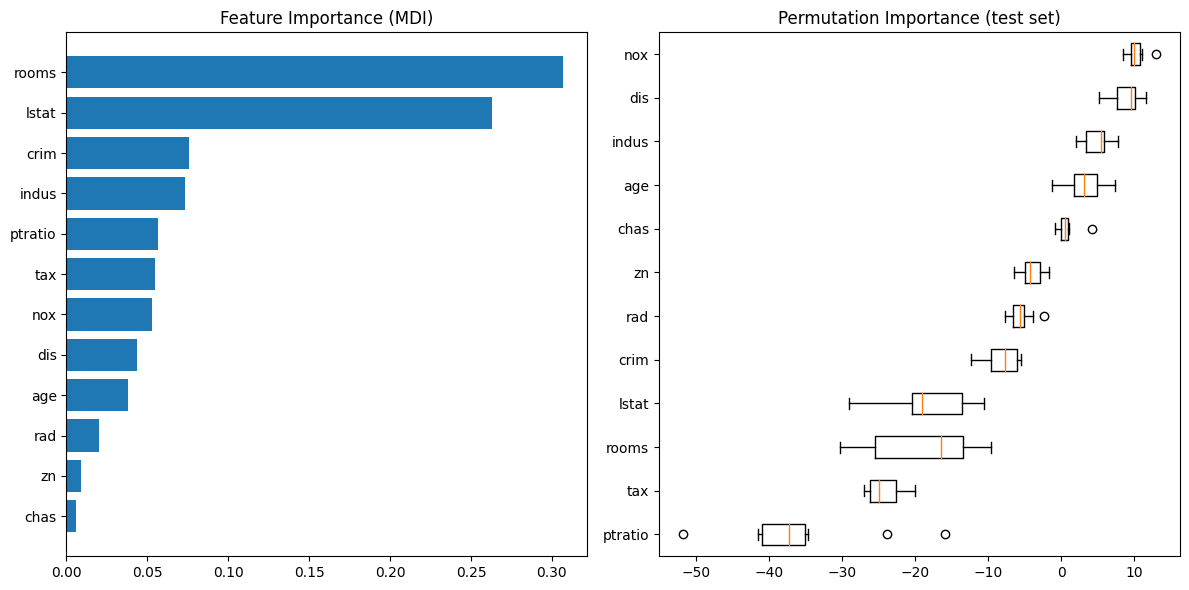

In [ ]:
# Random Forest sqrt: Feature Importance Plots
feature_importance = Random_Forest_SQRT.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(boston.columns.values)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(Random_Forest_SQRT, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(boston.columns.values)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

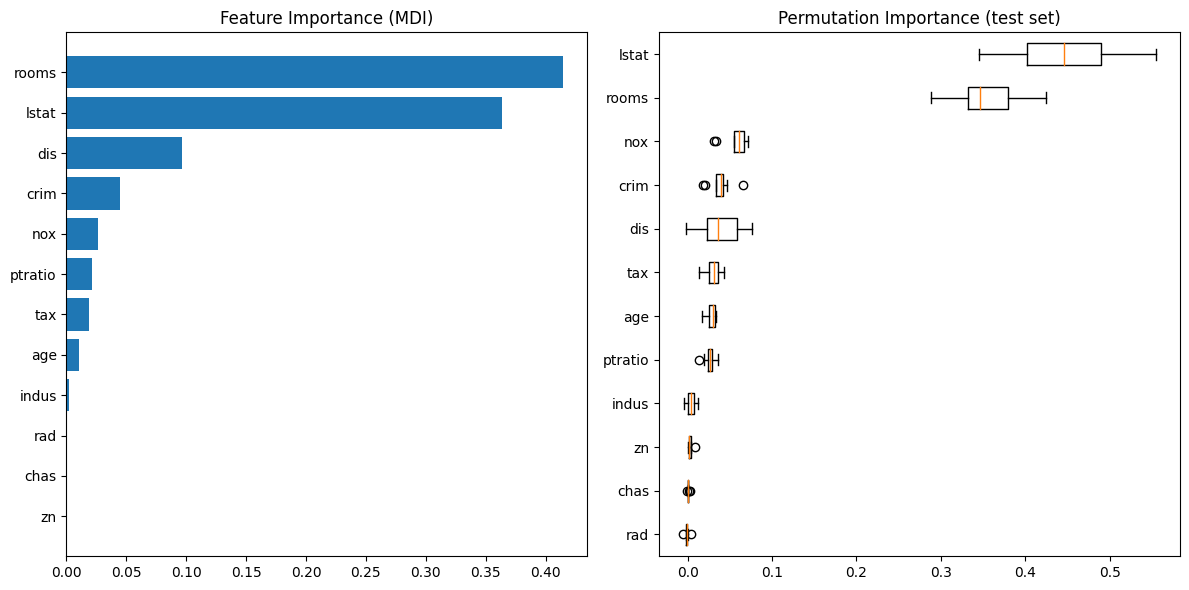

In [ ]:
# Gradient Boosting: Feature Importance Plots
feature_importance = gbr_m1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(boston.columns.values)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(gbr_m1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(boston.columns.values)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

###### MODEL PERFORMANCE REPORT / SUMMARY

In [ ]:
# MODEL ACCURACY REPORT SUMMARY
# only pick the notable results

print('\nMODEL ACCURACY REPORT SUMMARY')
print('{}\t\t\t\t\t {}\t {}\t {}'.format('\nMODEL','TRAIN SET(%)','TEST SET(%)','ENTIRE SET(%)'))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(lr,acc_lr_train,acc_lr_test,acc_lr_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(ridge,acc_ridge_train,acc_ridge_test,acc_ridge_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(lasso,acc_lasso_train,acc_lasso_test,acc_lasso_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(elasticNet,acc_elasticNet_train,acc_elasticNet_test,acc_elasticNet_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_1,acc_Random_Forest_1_train,acc_Random_Forest_1_test,acc_Random_Forest_1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_6,acc_Random_Forest_6_train,acc_Random_Forest_6_test,acc_Random_Forest_6_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_7,acc_Random_Forest_7_train,acc_Random_Forest_7_test,acc_Random_Forest_7_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_SQRT,acc_Random_Forest_SQRT_train,acc_Random_Forest_SQRT_test,acc_Random_Forest_SQRT_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_LOG2,acc_Random_Forest_LOG2_train,acc_Random_Forest_LOG2_test,acc_Random_Forest_LOG2_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(gbr_m1,acc_gbr_m1_train,acc_gbr_m1_test,acc_gbr_m1_all))

# MODEL RMSE REPORT SUMMARY

print('\nMODEL RMSE REPORT SUMMARY')
print('{}\t\t\t\t\t {}\t {}\t {}'.format('\nMODEL','TRAIN SET','TEST SET','ENTIRE SET'))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(lr,rmse_lr_train,rmse_lr_test,rmse_lr_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(ridge,rmse_ridge_train,rmse_ridge_test,rmse_ridge_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(lasso,rmse_lasso_train,rmse_lasso_test,rmse_lasso_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(elasticNet,rmse_elasticNet_train,rmse_elasticNet_test,rmse_elasticNet_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_1,rmse_Random_Forest_1_train,rmse_Random_Forest_1_test,rmse_Random_Forest_1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_6,rmse_Random_Forest_6_train,rmse_Random_Forest_6_test,rmse_Random_Forest_6_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_7,rmse_Random_Forest_7_train,rmse_Random_Forest_7_test,rmse_Random_Forest_7_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_SQRT,rmse_Random_Forest_SQRT_train,rmse_Random_Forest_SQRT_test,rmse_Random_Forest_SQRT_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(Random_Forest_LOG2,rmse_Random_Forest_LOG2_train,rmse_Random_Forest_LOG2_test,rmse_Random_Forest_LOG2_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(gbr_m1,rmse_gbr_m1_train,rmse_gbr_m1_test,rmse_gbr_m1_all))


MODEL ACCURACY REPORT SUMMARY

MODEL					 TRAIN SET(%)	 TEST SET(%)	 ENTIRE SET(%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)		 0.78		 0.64		 0.73
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)		 0.77		 0.64		 0.73
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)		 0.29		 0.26		 0.28
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)		 0.19		 0.15		 0.17
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, 

#### Boston_Housing_Study
#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.